# <center> Multiple Linear Regression with Python Scikit Learn

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing Data

df= pd.read_csv('petrol_consumption.csv')

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


# EDA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [6]:
corr= df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot:>

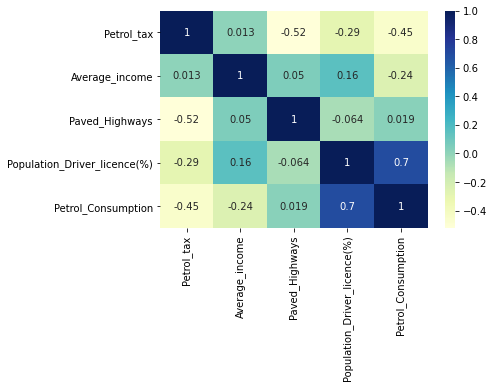

In [7]:
sns.heatmap(corr, annot= True, cmap="YlGnBu" )

Text(0.5, 1.0, 'Correlation using GGPLOT')

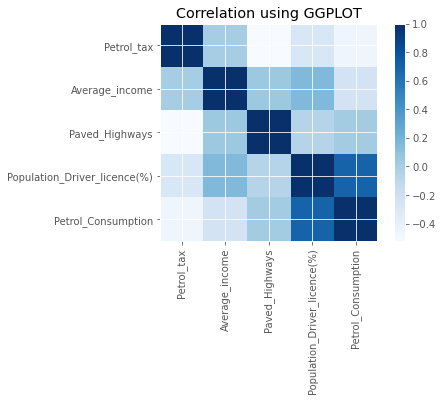

In [8]:
plt.style.use('ggplot')
plt.imshow(corr, cmap= plt.cm.Blues, interpolation= 'nearest')
plt.colorbar()
tick_marks= [i for i in range (len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.title('Correlation using GGPLOT')

## Builing Machine Learning Model

In [9]:
#X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
#y = dataset['Petrol_Consumption']

In [10]:
X= df.iloc[:, np.r_[0:4]]
y= df.iloc[:, 4]

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1711)

In [13]:
lm= LinearRegression()

In [14]:
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-39.130972
Average_income,-0.058184
Paved_Highways,-0.002743
Population_Driver_licence(%),1170.156673


In [16]:
#for detail description of linear coefficients, intercepts, deviations, and many more
import statsmodels.api as sm
X1_train= sm.add_constant(X_train)
result = sm.OLS(y_train, X1_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Petrol_Consumption   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     19.13
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           5.11e-08
Time:                        13:40:58   Log-Likelihood:                -192.23
No. Observations:                  36   AIC:                             394.5
Df Residuals:                      31   BIC:                             402.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [17]:
y_pred= lm.predict(X_test)

In [18]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 65.0721017965851
Mean Squared Error: 8471.940070667446
Root Mean Squared Error: 92.04314244237561
